# Applied Data Science with Python
## Identifying Types of Variables

### Import Libraries

In [85]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import norm, poisson, bernoulli
import jinja2 # To work on Tables in Jupyter Notebooks

### Data Check-In
Reviewing the current state of the dataset. During my last session, it felt like there had been a significant shift, so I ran a comparison against the original file. Fortunately, no major changes were detected. I've also created a new DataFrame to inspect the latest structure and ensure everything is aligned before moving forward.

In [86]:
### import csv file
data = pd.read_csv('NSMES1988updated.csv')
print("Display Data head:")
print(data.head())
#Create new pandas dataframe
df = pd.DataFrame(data)

Display Data head:
   visits  nvisits  ovisits  novisits  emergency  hospital   health  chronic  \
0       5        0        0         0          0         1  average        2   
1       1        0        2         0          2         0  average        2   
2      13        0        0         0          3         3     poor        4   
3      16        0        5         0          1         1     poor        2   
4       3        0        0         0          0         0  average        2   

       adl region  age  gender married  school    income employed insurance  \
0   normal  other   69    male     yes       6 28,810.00      yes       yes   
1   normal  other   74  female     yes      10 27,478.00       no       yes   
2  limited  other   66  female      no      10  6,532.00       no        no   
3  limited  other   76    male     yes       3  6,588.00       no       yes   
4  limited  other   79  female     yes       6  6,588.00       no       yes   

  medicaid  income_log  


In [87]:
print("**Display basic statistics:**")
print(data.describe())

print("\n**Display basic statistics:**")

# Format floats nicely
pd.options.display.float_format = '{:,.2f}'.format

summary = data.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).T

# Optional: rename some columns for readability (only if they exist)
summary = summary.rename(columns={
    '10%': 'P10',
    '25%': 'Q1',
    '50%': 'Median',
    '75%': 'Q3',
    '90%': 'P90'
})

print(summary.to_string())

**Display basic statistics:**
        visits  nvisits  ovisits  novisits  emergency  hospital  chronic  \
count 4,406.00 4,406.00 4,406.00  4,406.00   4,406.00  4,406.00 4,406.00   
mean      5.77     1.62     0.75      0.54       0.26      0.30     1.54   
std       6.76     5.32     3.65      3.88       0.70      0.75     1.35   
min       0.00     0.00     0.00      0.00       0.00      0.00     0.00   
25%       1.00     0.00     0.00      0.00       0.00      0.00     1.00   
50%       4.00     0.00     0.00      0.00       0.00      0.00     1.00   
75%       8.00     1.00     0.00      0.00       0.00      0.00     2.00   
max      89.00   104.00   141.00    155.00      12.00      8.00     8.00   

           age   school     income  income_log  
count 4,406.00 4,406.00   4,403.00    4,406.00  
mean     74.02    10.29  25,295.00        9.71  
std       6.33     3.74  29,242.35        1.11  
min      66.00     0.00       0.00        0.00  
25%      69.00     8.00   9,131.50      

## Understanding the Types of Data we currently have by just visualizing the csv file directly
| Column       | Type        | Subtype   | Notes                                      |
|--------------|-------------|-----------|--------------------------------------------|
| visits       | Numerical   | Discrete  | Count of visits                            |
| nvisits      | Numerical   | Discrete  | Count                                      |
| ovisits      | Numerical   | Discrete  | Count                                      |
| novisits     | Numerical   | Discrete  | Count                                      |
| emergency    | Numerical   | Discrete  | Emergency visit count                      |
| hospital     | Numerical   | Discrete  | Hospital visit count                       |
| health       | Categorical | Ordinal   | Poor < Fair < Good < Excellent             |
| chronic      | Numerical   | Discrete  | Number of chronic conditions               |
| adl          | Categorical | Ordinal   | Activities of daily living score           |
| region       | Categorical | Nominal   | North, South, East, West                   |
| age          | Numerical   | Continuous| Age in years                               |
| gender       | Categorical | Nominal   | Male/Female/Other                          |
| married      | Categorical | Nominal   | Marital status                             |
| school       | Numerical   | Discrete  | Education level (years or coded levels)    |
| income       | Numerical   | Continuous| Raw income                                 |
| employed     | Categorical | Nominal   | Employment status                          |
| insurance    | Categorical | Nominal   | Insurance coverage                         |
| medicaid     | Categorical | Nominal   | Medicaid coverage                          |
| income_log   | Numerical   | Continuous| Log-transformed income (for normalization) |

This helps us identify the various data types present in our dataset, including numerical, categorical, ordinal, discrete, nominal, and continuous variables. With this understanding, we can begin selecting which features are most meaningful to compare in order to craft a compelling narrative.

### Visualize Categorical Data (Health & Region)

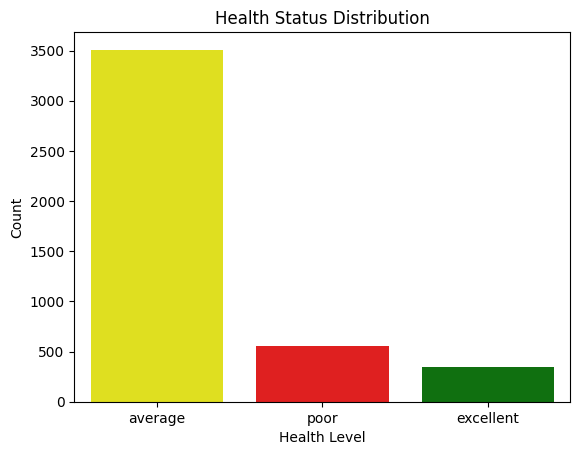

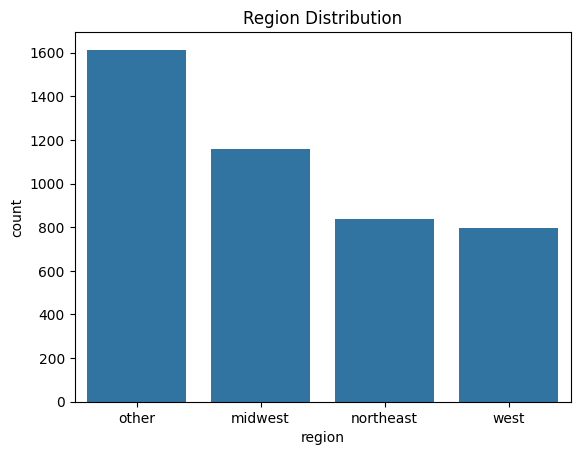

In [88]:
# Health distribution
sns.countplot(x='health', data=df)
plt.title('Health Status Distribution')
health_palette = {'excellent': 'green', 'average': 'yellow', 'poor': 'red'}
health_order = ['excellent', 'average', 'poor']
sns.countplot(x='health', hue='health', data=df, palette=health_palette, legend=False)
plt.title('Health Status Distribution')
plt.xlabel('Health Level')
plt.ylabel('Count')
plt.show()

# Region distribution
sns.countplot(x='region', data=df)
plt.title('Region Distribution')
plt.show()


The first plot visualizes the distribution of health status across the dataset, categorized into **excellent**, **average**, and **poor**. By explicitly ordering these categories and assigning distinct colors, we ensure clarity and consistency in how health levels are represented. This helps us quickly identify which health status is most prevalent and sets the stage for deeper comparisons across other variables.

The second plot shows the distribution of individuals across different regions. This gives us a sense of how the dataset is geographically structured, which can be useful when analyzing regional disparities in health or other outcomes.

### Checking Corelation of health Status and Region

health     average  excellent  poor
region                             
midwest        957         90   110
northeast      694         57    86
other         1237        105   272
west           621         91    86


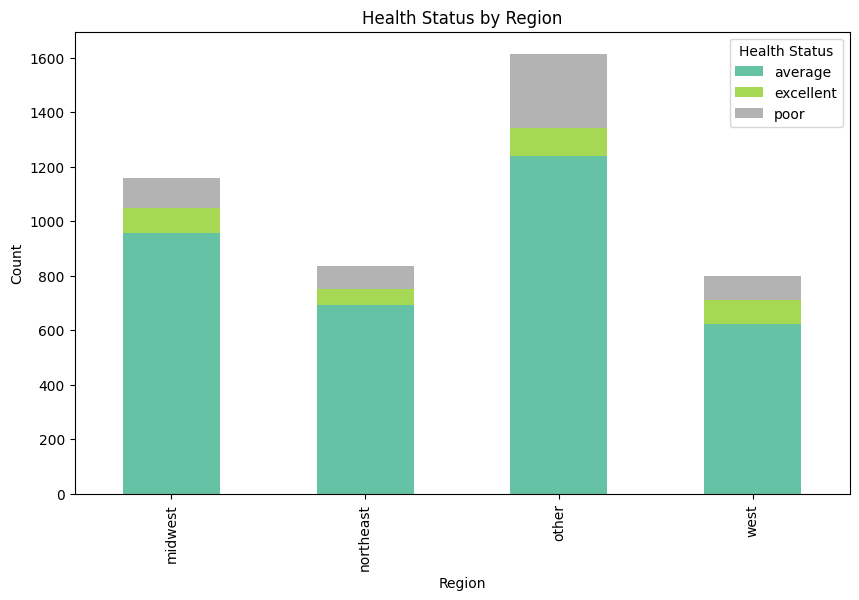

In [89]:
health_region = pd.crosstab(df['region'], df['health'])
print(health_region)

# Stacked bar chart
health_region.plot(kind='bar', stacked=True, figsize=(10,6), colormap="Set2")
plt.title("Health Status by Region")
plt.ylabel("Count")
plt.xlabel("Region")
plt.legend(title="Health Status")
plt.show()


Other regions have more healthy people but at the same time also has more poor people. It could be because other regions consists of a cluster of "other" regions.

## Univariate Statistical Analysis
Looking at each variable on its own to get a sense of how the data is spread out and where the center lies.  
- Show the main summary numbers (mean, median, mode, and skewness).  
- Plot the distribution with a histogram, using a log scale when it makes the shape clearer.  
- Add a boxplot that caps extreme values at the 95th percentile, while still pointing out the true maximum and other key stats.
### Regular Visits ("visits")



Mean: 5.77
Median: 4.0
Mode(s): [0]
Visits Skewness: 3.34 → Positive (right-skewed)


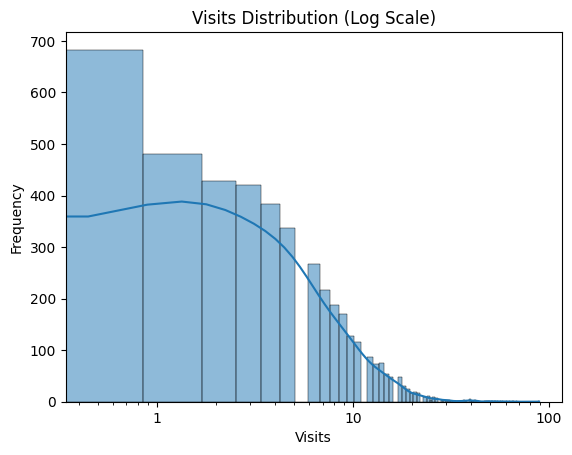

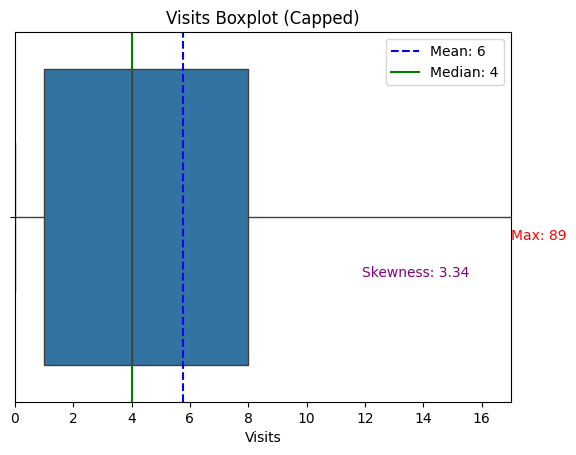

In [90]:
# Visits distribution analysis
meanValue = df['visits'].mean()
medianValue = df['visits'].median()
modes = df['visits'].mode().tolist()
skewValue = df['visits'].skew()
skewType = "Positive (right-skewed)" if skewValue > 0 else "Negative (left-skewed)" if skewValue < 0 else "Symmetric"

print(f"Mean: {meanValue:.2f}")
print(f"Median: {medianValue}")
print(f"Mode(s): {modes}")
print(f"Visits Skewness: {skewValue:.2f} → {skewType}")

# Histogram (log scale)
sns.histplot(df['visits'], kde=True)
plt.title('Visits Distribution (Log Scale)')
plt.xscale('log')
plt.xlabel('Visits')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(ticker.NullFormatter())
plt.show()

#Boxplot
upperLimit = df['visits'].quantile(0.95)
trueMax = df['visits'].max()

sns.boxplot(x=df['visits'])
plt.title('Visits Boxplot (Capped)')
plt.xlabel('Visits')
plt.xlim(df['visits'].min(), upperLimit)

# Annotate max and skewness
plt.text(upperLimit, 0.05, f"Max: {trueMax}", ha='left', va='center', color='red', fontsize=10)
plt.axvline(meanValue, color='blue', linestyle='--', label=f"Mean: {meanValue:.0f}")
plt.axvline(medianValue, color='green', linestyle='-', label=f"Median: {medianValue:.0f}")
plt.text(upperLimit * 0.7, 0.15, f"Skewness: {skewValue:.2f}", ha='left', va='center', color='purple', fontsize=10)

plt.legend()
plt.show()


The histogram shows that most people had very few visits, with the distribution heavily skewed to the right due to a handful of extreme cases. The boxplot reinforces this, </br>highlighting a median of 4, a mean pulled upward to 6, and a maximum of 89 visits that drives the strong positive skew.

### Non Hospital Visits / Non urgent Visits? ("nvisits")

Mean: 1.62
Median: 0.0
Mode(s): [0]
Nvisits skewness: 7.59 → positive (right-skewed)


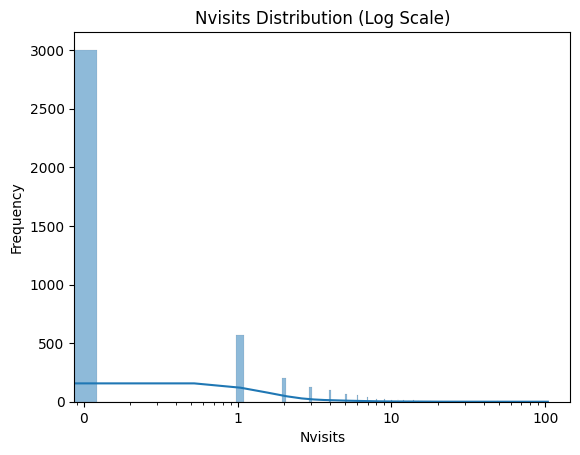

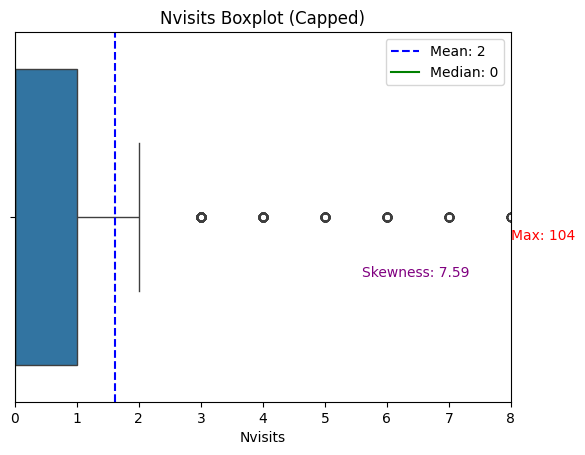

In [91]:
# Nvisits distribution analysis
meanValue = df['nvisits'].mean()
medianValue = df['nvisits'].median()
modeVals = df['nvisits'].mode().tolist()
skewValue = df['nvisits'].skew()
skewType = "positive (right-skewed)" if skewValue > 0 else "negative (left-skewed)" if skewValue < 0 else "symmetric"

print(f"Mean: {meanValue:.2f}")
print(f"Median: {medianValue}")
print(f"Mode(s): {modeVals}")
print(f"Nvisits skewness: {skewValue:.2f} → {skewType}")

# Histogram
sns.histplot(df['nvisits'], kde=True)
plt.title('Nvisits Distribution (Log Scale)')
plt.xscale('log')
plt.xlabel('Nvisits')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(ticker.NullFormatter())
plt.show()

# Boxplot
upperLimit = df['nvisits'].quantile(0.95)
trueMax = df['nvisits'].max()

sns.boxplot(x=df['nvisits'])
plt.title('Nvisits Boxplot (Capped)')
plt.xlabel('Nvisits')
plt.xlim(df['nvisits'].min(), upperLimit)

plt.text(upperLimit, 0.05, f"Max: {trueMax}", ha='left', va='center', color='red', fontsize=10)
plt.axvline(meanValue, color='blue', linestyle='--', label=f"Mean: {meanValue:.0f}")
plt.axvline(medianValue, color='green', linestyle='-', label=f"Median: {medianValue:.0f}")
plt.text(upperLimit * 0.7, 0.15, f"Skewness: {skewValue:.2f}", ha='left', va='center', color='purple', fontsize=10)

plt.legend()
plt.show()

Most people had n0 nvisits, and the histogram drops off sharply as the number of visits increases. The boxplot shows a median of 0 with a few extreme outliers pulling the mean upward and creating strong right skew.

### Outpatient Visits? ("ovisits")

Mean: 0.75
Median: 0.0
Mode(s): [0]
Ovisits skewness: 18.88 → positive (right-skewed)


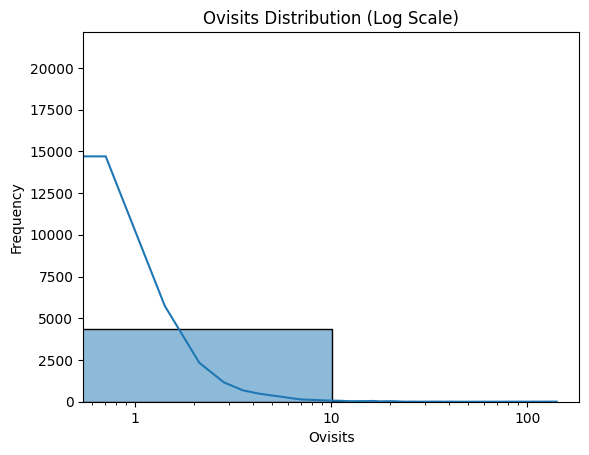

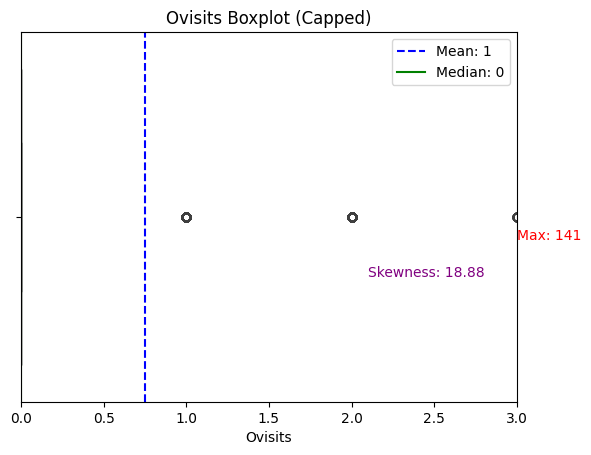

In [92]:
# Ovisits distribution analysis
meanValue = df['ovisits'].mean()
medianValue = df['ovisits'].median()
modeVals = df['ovisits'].mode().tolist()
skewValue = df['ovisits'].skew()
skewType = "positive (right-skewed)" if skewValue > 0 else "negative (left-skewed)" if skewValue < 0 else "symmetric"

print(f"Mean: {meanValue:.2f}")
print(f"Median: {medianValue}")
print(f"Mode(s): {modeVals}")
print(f"Ovisits skewness: {skewValue:.2f} → {skewType}")

# Histogram
sns.histplot(df['ovisits'], kde=True)
plt.title('Ovisits Distribution (Log Scale)')
plt.xscale('log')
plt.xlabel('Ovisits')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(ticker.NullFormatter())
plt.show()

upperLimit = df['ovisits'].quantile(0.95)
trueMax = df['ovisits'].max()

# Boxplot
sns.boxplot(x=df['ovisits'])
plt.title('Ovisits Boxplot (Capped)')
plt.xlabel('Ovisits')
plt.xlim(df['ovisits'].min(), upperLimit)

plt.text(upperLimit, 0.05, f"Max: {trueMax}", ha='left', va='center', color='red', fontsize=10)
plt.axvline(meanValue, color='blue', linestyle='--', label=f"Mean: {meanValue:.0f}")
plt.axvline(medianValue, color='green', linestyle='-', label=f"Median: {medianValue:.0f}")
plt.text(upperLimit * 0.7, 0.15, f"Skewness: {skewValue:.2f}", ha='left', va='center', color='purple', fontsize=10)

plt.legend()
plt.show()

Distribution drops off quickly as the number of visits increases, with a few extreme outliers stretching the scale.

### No Visits / No Show? ("novisits")

Mean: 0.54
Median: 0.0
Mode(s): [0]
Novisits skewness: 23.67 → positive (right-skewed)


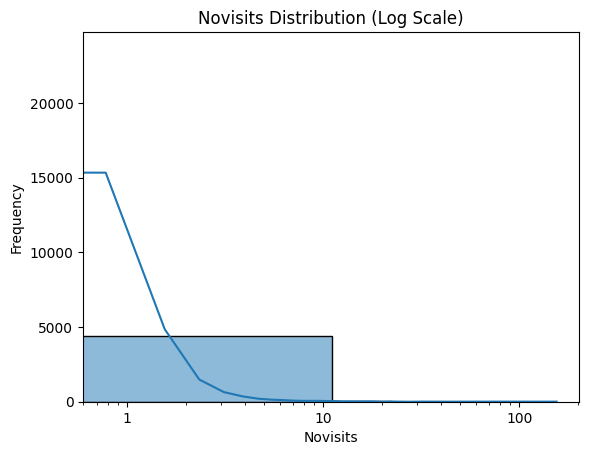

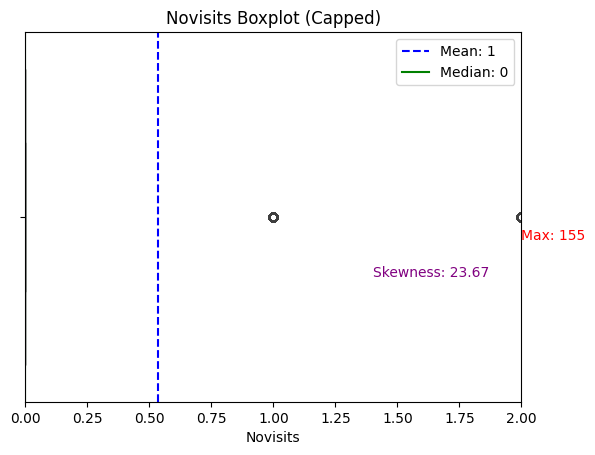

In [93]:
# Novisits distribution analysis
meanValue = df['novisits'].mean()
medianValue = df['novisits'].median()
modeVals = df['novisits'].mode().tolist()
skewValue = df['novisits'].skew()
skewType = "positive (right-skewed)" if skewValue > 0 else "negative (left-skewed)" if skewValue < 0 else "symmetric"

print(f"Mean: {meanValue:.2f}")
print(f"Median: {medianValue}")
print(f"Mode(s): {modeVals}")
print(f"Novisits skewness: {skewValue:.2f} → {skewType}")

# Histogram
sns.histplot(df['novisits'], kde=True)
plt.title('Novisits Distribution (Log Scale)')
plt.xscale('log')
plt.xlabel('Novisits')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(ticker.NullFormatter())
plt.show()

upperLimit = df['novisits'].quantile(0.95)
trueMax = df['novisits'].max()

# Boxplot
sns.boxplot(x=df['novisits'])
plt.title('Novisits Boxplot (Capped)')
plt.xlabel('Novisits')
plt.xlim(df['novisits'].min(), upperLimit)

plt.text(upperLimit, 0.05, f"Max: {trueMax}", ha='left', va='center', color='red', fontsize=10)
plt.axvline(meanValue, color='blue', linestyle='--', label=f"Mean: {meanValue:.0f}")
plt.axvline(medianValue, color='green', linestyle='-', label=f"Median: {medianValue:.0f}")
plt.text(upperLimit * 0.7, 0.15, f"Skewness: {skewValue:.2f}", ha='left', va='center', color='purple', fontsize=10)

plt.legend()
plt.show()

Most people had no new visits recorded, and the histogram shows the frequency dropping off quickly as the number of visits increases. 

### Years of Schooling

Mean: 10.29
Median: 11.0
Mode(s): [12]
Skewness: -0.44 → Negative (left-skewed)


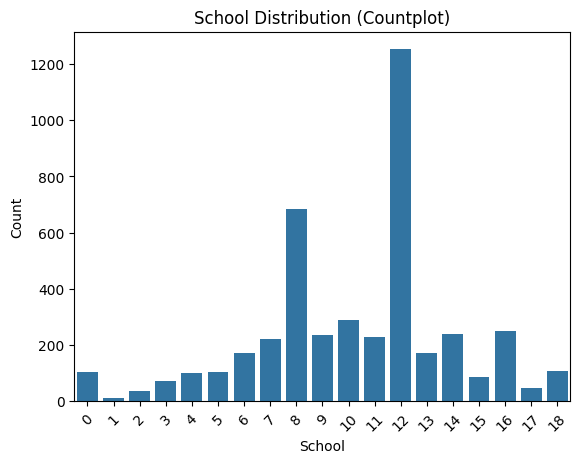

In [94]:
# School distribution analysis
print(f"Mean: {df['school'].mean():.2f}")
print(f"Median: {df['school'].median()}")
modes = df['school'].mode().tolist()
print(f"Mode(s): {modes}")
skew_val = df['school'].skew()
skew_type = "Positive (right-skewed)" if skew_val > 0 else "Negative (left-skewed)" if skew_val < 0 else "Symmetric"
print(f"Skewness: {skew_val:.2f} → {skew_type}")

# Histogram
sns.countplot(x='school', data=df, order=sorted(df['school'].unique()))
plt.title('School Distribution (Countplot)')
plt.xlabel('School')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Most patients have finished high school, with 12 being the largest group. There’s also a clear cluster around 8th grade, while the other levels show smaller counts. Overall, a few years of school dominate the dataset, with most patients sharing similar schooling levels.

### Income Distribution

Mean: 25295.00
Median: 16986.0
Mode(s): [4320.0]
Income skewness: 5.97 → positive (right-skewed)


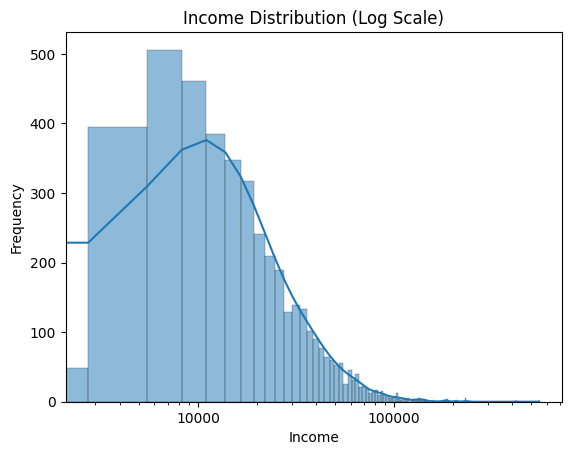

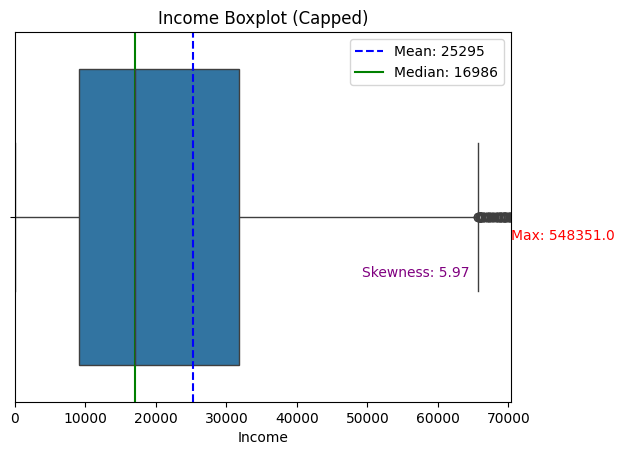

In [95]:
# Income distribution analysis
meanValue = df['income'].mean()
medianValue = df['income'].median()
modeVals = df['income'].mode().tolist()
skewValue = df['income'].skew()
skewType = "positive (right-skewed)" if skewValue > 0 else "negative (left-skewed)" if skewValue < 0 else "symmetric"

print(f"Mean: {meanValue:.2f}")
print(f"Median: {medianValue}")
print(f"Mode(s): {modeVals}")
print(f"Income skewness: {skewValue:.2f} → {skewType}")

# Histogram
sns.histplot(df['income'], kde=True)
plt.title('Income Distribution (Log Scale)')
plt.xscale('log')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(ticker.NullFormatter())
plt.show()

upperLimit = df['income'].quantile(0.95)
trueMax = df['income'].max()

# Boxplot
sns.boxplot(x=df['income'])
plt.title('Income Boxplot (Capped)')
plt.xlabel('Income')
plt.xlim(df['income'].min(), upperLimit)

plt.text(upperLimit, 0.05, f"Max: {trueMax}", ha='left', va='center', color='red', fontsize=10)
plt.axvline(meanValue, color='blue', linestyle='--', label=f"Mean: {meanValue:.0f}")
plt.axvline(medianValue, color='green', linestyle='-', label=f"Median: {medianValue:.0f}")
plt.text(upperLimit * 0.7, 0.15, f"Skewness: {skewValue:.2f}", ha='left', va='center', color='purple', fontsize=10)

plt.legend()
plt.show()

### Gender Distribution

gender
female    2628
male      1778
Name: count, dtype: int64
Mode: female


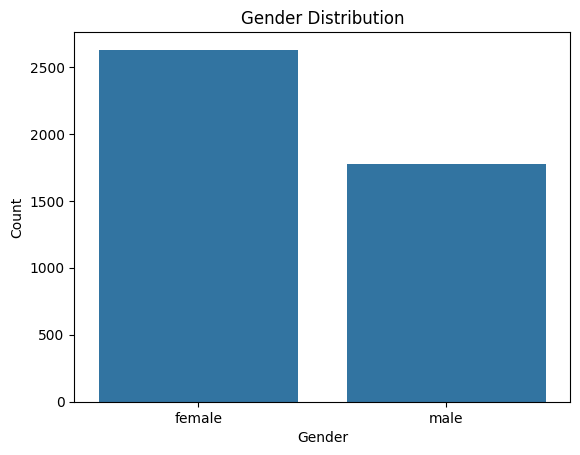

In [96]:
# Gender distribution analysis
print(df['gender'].value_counts())
print("Mode:", df['gender'].mode()[0])

sns.countplot(x='gender', data=df, order=df['gender'].value_counts().index)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### All Binary Categorical Data
This section summarizes and visualizes the distributions of the binary variables, due to the values being self explanatory: **employed, insurance, medicaid, married** I have decided to keep it in one cell.


EMPLOYED Summary
employed
no     3951
yes     455
Name: count, dtype: int64


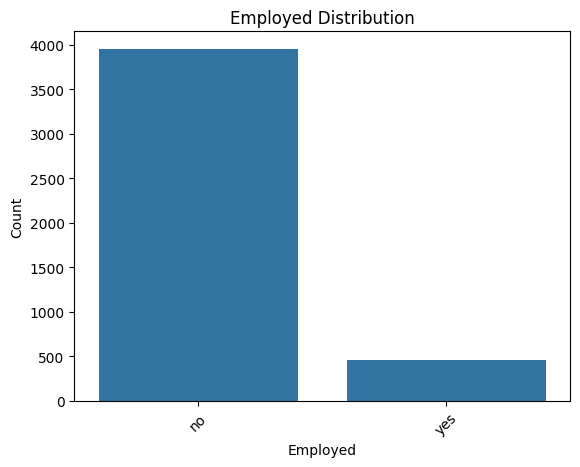


INSURANCE Summary
insurance
yes    3421
no      985
Name: count, dtype: int64


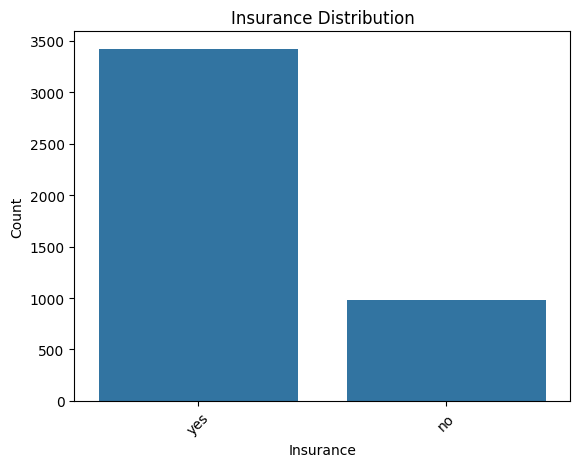


MEDICAID Summary
medicaid
no     4004
yes     402
Name: count, dtype: int64


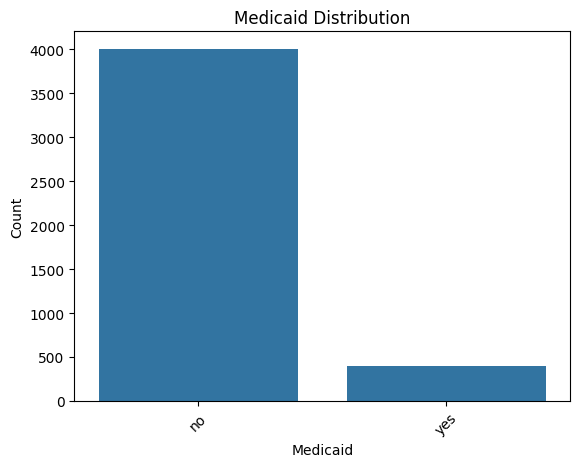


MARRIED Summary
married
yes    2406
no     2000
Name: count, dtype: int64


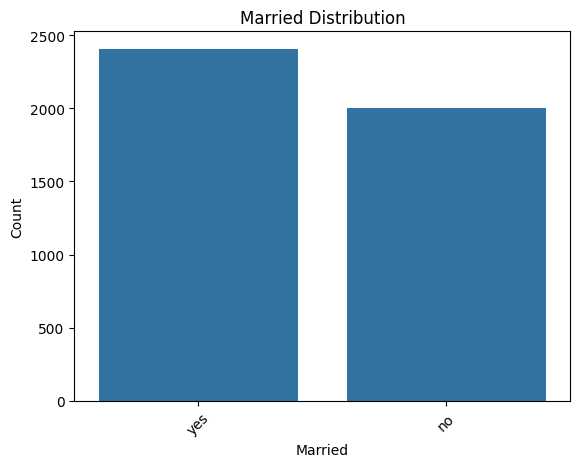

In [97]:
binary_columns = ['employed', 'insurance', 'medicaid', 'married']

for col in binary_columns:
    print(f"\n{col.upper()} Summary")
    print(df[col].value_counts())

    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Looking at the data we can infer that there's a higher unemployed rate. More people have insurance. There's a higher percentage of people with no medicaid, and the married and unmarried numbers are almost the same with more people being married.


## Analyze Datasets - Relationships
### Age and Gender Distribution

In [98]:
# Age bins
ageBins = [65, 75, 85, 95, 110]
ageLabels = ['65-74', '75-84', '85-94', '95+']
df['age_group'] = pd.cut(df['age'], bins=ageBins, labels=ageLabels, right=False)
ageGenderDistribution = pd.crosstab(df['age_group'], df['gender'])

# Remove the gender in the column name to give it a clean look
ageGenderDistribution.columns.name = None

youngest = df['age'].min()
oldest = df['age'].max()
print(f"Youngest age in dataset: {youngest}")
print(f"Oldest age in dataset: {oldest}")
ageGenderDistribution.style.format("{:,.0f}")

Youngest age in dataset: 66
Oldest age in dataset: 109


,female,male
age_group,,
65-74,"1,506","1,114"
75-84,923,552
85-94,186,106
95+,13,6


### Health Status by Gender

In [99]:
# Health and Gender distribution in table
healthGenderDistribution = pd.crosstab(df['health'], df['gender'])
healthGenderDistribution.columns.name = None
healthGenderDistribution.style.format("{:,.0f}")

,female,male
health,,
average,"2,093","1,416"
excellent,193,150
poor,342,212


### Income Distribution by Gender

In [100]:
# Income summary by gender
incomeGenderDistribution = df.groupby('gender')['income'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max'
)

incomeGenderDistribution.round(2).style.format("{:,.0f}")

,count,mean,median,min,max
gender,,,,,
female,"2,627","22,506","14,168",0,"548,351"
male,"1,776","29,421","20,584",0,"548,351"


### Regional Income Distribution

In [101]:
# Income summary by region
regionalIncomeDistribution = df.groupby('region')['income'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max'
)

regionalIncomeDistribution.round(2).style.format("{:,.0f}")

,count,mean,median,min,max
region,,,,,
midwest,"1,157","25,136","17,875",0,"548,351"
northeast,837,"26,797","17,413",0,"417,596"
other,"1,612","21,702","14,238",0,"360,024"
west,797,"31,214","20,656",0,"242,161"


I wonder if it would better to see these numbers as estimated whole number like 18000, or 15000.

### Age & Income Analysis

In [102]:
# Income summary by age group
ageIncomeDistribution = df.groupby('age_group')['income'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max'
)

ageIncomeDistribution.round(2).style.format("{:,.0f}")

C:\Users\Juicy\AppData\Local\Temp\ipykernel_15336\1329429290.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ageIncomeDistribution = df.groupby('age_group')['income'].agg(


,count,mean,median,min,max
age_group,,,,,
65-74,"2,619","27,082","18,728",0,"548,351"
75-84,"1,473","22,307","14,484",0,"417,596"
85-94,292,"24,684","13,500",453,"204,960"
95+,19,"19,947","17,619","3,168","41,587"


For a moment I thought maybe this looked exactly like the Regional Income Distribution but there was slight differences but the max was the same so that would be something to look into and understand what's going on.

## Summary

Working on this capstone was genuinely fun and rewarding. I’ve always wanted to understand how to analyze random datasets, and this project made the process feel simple by starting with one variable at a time and focusing on the shape of the data before jumping to conclusions. Once I moved on to comparing relationships, it felt easier because the instructions guided me, though I know in reality that kind of analysis can be challenging. What helped me most was facing the data directly in the CSV file and creating charts to see the types of data we were given. That step gave me clarity on concepts that used to confuse me in class, like categorical vs. numerical, discrete vs. continuous, and ordinal vs. nominal. Visualizing the data made those ideas click, and from there I could better understand how to approach comparisons and relationships. My main goal throughout was to learn how to tell a story with the data, step by step, while keeping in mind the audience. I still feel nervous about storytelling in projects like this, but I know it’s an important skill. Another focus for me was learning to cut out data points that don’t add much meaning—like extreme maximum values that are more like lottery wins than useful insights. Overall, this capstone gave me confidence, structure, and a clearer sense of how to analyze and present data in a way that makes sense.